In [ ]:
#Classification
1.#Logistic Regression is used for binary classification.Requires large sample size. dependant variable should be dichotomous 
#in nature(present vs absent)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [3]:
url='D:\\datasets\\train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_data=titanic.drop(['Name','Ticket','Cabin','Embarked','SibSp','Parch','Fare'],axis=1)


In [9]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


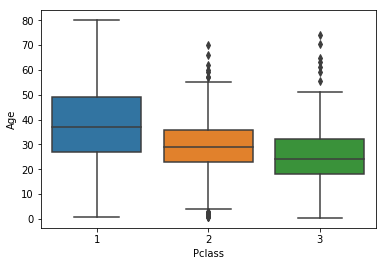

In [11]:
sb.boxplot(x='Pclass',y='Age',data=titanic_data)#Since pclass is 1,2,3 so median is taken. So for 177 missing data different values will be there for better accuracy.

In [12]:
def age_approx(cols):
    Age = cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(age_approx,axis=1)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [17]:
gender = pd.get_dummies(titanic_data['Sex'])

In [18]:
titanic_data.drop(['Sex'],axis=1,inplace=True)

In [20]:
titanic_dmy=pd.concat([titanic_data,gender],axis=1)
titanic_dmy.head()

,PassengerId,Survived,Pclass,Age,female,male
0,1,0,3,22.0,0,1
1,2,1,1,38.0,1,0
2,3,1,3,26.0,1,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,1


In [38]:
y=titanic_dmy.iloc[:,1]
x=titanic_dmy.iloc[:,[0,2,3,4,5]].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15, random_state=11)

In [35]:
'''ts_score=[]
import numpy as np
for j in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=j,test_size=0.1)
    kn=LogisticRegression ().fit(x_train,y_train)
    
    ts_score.append(kn.score(x_test,y_test))
K = ts_score.index(np.max(ts_score))'''

D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [33]:
#K

11

In [39]:
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
y_pred = LogReg.predict(x_test)

D:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
accuracy_score(y_test,y_pred)

0.8656716417910447